In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from IPython.display import display

np.random.seed(42)
pd.options.display.max_columns = None
data = pd.read_csv('../data/interim/data_cleaned.csv')

In [2]:
#drop first column
data.drop(columns='Unnamed: 0',inplace=True)
#make responseID the index
data.set_index('ResponseID',inplace=True)

print(data.shape)
print(data.describe(include='all'))
print(data.info())

(10294, 91)
       ResponseName ReleaseDate   RequiredAge     DemoCount  DeveloperCount  \
count         10294        9960  10294.000000  10294.000000    10240.000000   
unique        10287        1838           NaN           NaN             NaN   
top            Rise  2016-04-05           NaN           NaN             NaN   
freq              2          56           NaN           NaN             NaN   
mean            NaN         NaN      0.926171      0.098893        1.083594   
std             NaN         NaN      3.798325      0.299182        0.369567   
min             NaN         NaN      0.000000      0.000000        1.000000   
25%             NaN         NaN      0.000000      0.000000        1.000000   
50%             NaN         NaN      0.000000      0.000000        1.000000   
75%             NaN         NaN      0.000000      0.000000        1.000000   
max             NaN         NaN     18.000000      2.000000       12.000000   

            DLCCount   Metacritic    Mo

In [3]:
#Make a column totaling the number of languages
print(data.iloc[:,(data.columns.get_loc('English')):(data.columns.get_loc('Slovakian')+1)].columns)
data['NumLanguages'] = data.iloc[:,(data.columns.get_loc('English')):(data.columns.get_loc('Slovakian')+1)].sum(axis=1)
print(data['NumLanguages'].value_counts())

Index(['English', 'German', 'French', 'Spanish', 'Italian', 'Russian',
       'Japanese', 'Polish', 'Portuguese', 'Chinese', 'Dutch', 'Korean',
       'Czech', 'Turkish', 'Swedish', 'Hungarian', 'Danish', 'Norwegian',
       'Finnish', 'Ukrainian', 'Greek', 'Romanian', 'Arabic', 'Thai',
       'Bulgarian', 'Slovakian'],
      dtype='object')
1     5734
2     1025
5      753
6      492
3      402
7      366
4      333
8      289
9      244
10     204
11     133
12      88
13      53
14      33
25      30
16      25
15      17
0       13
17      12
19      12
24       9
18       8
23       6
22       5
20       5
21       3
Name: NumLanguages, dtype: int64


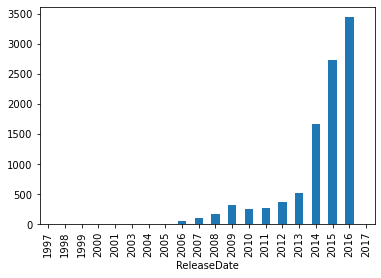

In [4]:
#Distribution of release dates
data['ReleaseDate'] = pd.to_datetime(data['ReleaseDate'], errors='coerce',infer_datetime_format = True)
_ = data['ReleaseDate'].groupby(data['ReleaseDate'].dt.year.astype('Int64')).count().plot(kind='bar')

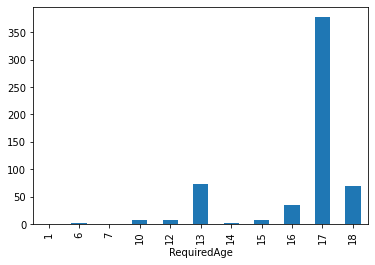

In [5]:
#Distribution of Required Age except zeros. However, most values are zero
_ = data[data['RequiredAge']>0]['RequiredAge'].groupby(data['RequiredAge']).count().plot(kind='bar')

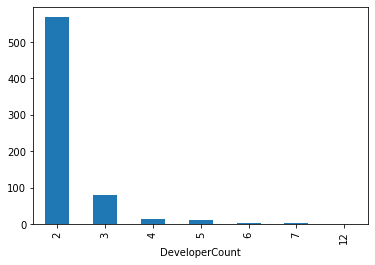

In [6]:
#Distribution of Developer Count over 1. However, most values are 1
_ = data[data['DeveloperCount']>1]['DeveloperCount'].groupby(data['DeveloperCount'].astype('Int64')).count().plot(kind='bar')

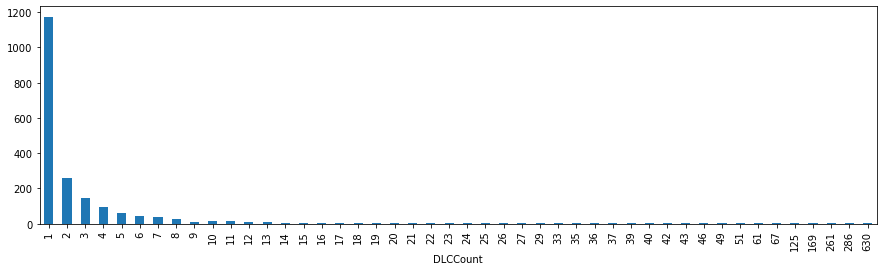

In [7]:
#Distribution of DLC Count over 0. However, most values are 0
_ = data[data['DLCCount']>0]['DLCCount'].groupby(data['DLCCount'].astype('Int64')).count().plot(kind='bar',figsize=(15,4))

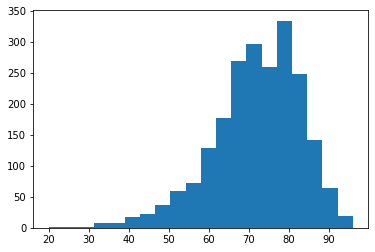

In [8]:
#Distribution of Metacritic values (note most are missing values)
_ = plt.hist(data['Metacritic'],bins=20)

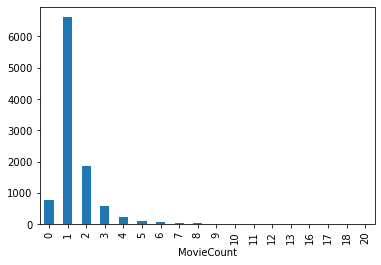

In [9]:
#Distribution of Movie Count
_ = data['MovieCount'].groupby(data['MovieCount'].astype('Int64')).count().plot(kind='bar')

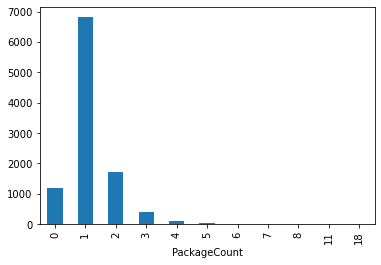

In [10]:
#Distribution of Package Count
_ = data['PackageCount'].groupby(data['PackageCount'].astype('Int64')).count().plot(kind='bar')

245 values greater than 10,000
5570 zeros


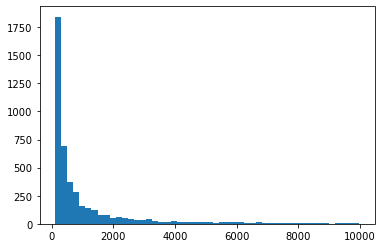

In [11]:
#Distribution of Rec Count. Extremely skewed and many zeroes.
#Restricting to between 0 and 10,000 to make more readable. Also printing # greater than 10,000 for reference, and # of zeros
_ = plt.hist(data[(data['RecommendationCount']<10000) & (data['RecommendationCount']>0)]['RecommendationCount'],bins=50)
print(str(data[data['RecommendationCount']>10000]['RecommendationCount'].count()) + ' values greater than 10,000')
print(str(data[data['RecommendationCount']==0]['RecommendationCount'].count()) + ' zeros')

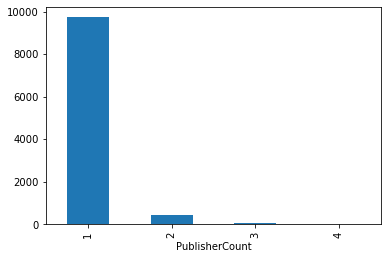

In [12]:
#Distribution of Publisher Count
_ = data['PublisherCount'].groupby(data['PublisherCount'].astype('Int64')).count().plot(kind='bar')

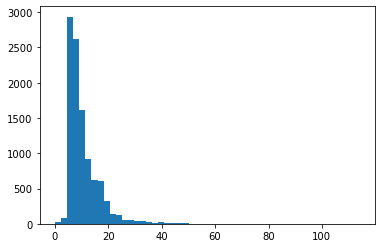

In [15]:
#Distribution of Screenshot Count
_ = plt.hist(data['ScreenshotCount'],bins=50)

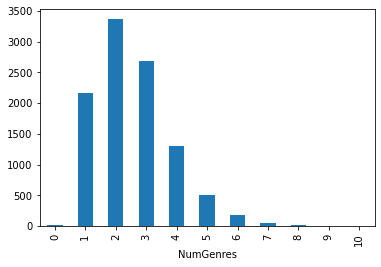

In [16]:
#Distribution of Number of Genres
_ = data['NumGenres'].groupby(data['NumGenres'].astype('Int64')).count().plot(kind='bar')

In [28]:
#Want to see if there's a systemic combination of genres that dominates multi-genre combos.
#After exploring, it seems the combinations are more or less random / the individual genre values are basically independent.
genres = list(data.columns[data.columns.get_loc('GenreIsIndie'):data.columns.get_loc('GenreIsMassivelyMultiplayer')+1])
data['CombinedGenre'] = data[genres].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [34]:
print(data[data['NumGenres']==2]['CombinedGenre'].value_counts().head(10))

True_True_False_False_False_False_False_False_False_False_False_False    802
True_False_True_False_False_False_False_False_False_False_False_False    486
True_False_False_True_False_False_False_False_False_False_False_False    377
False_True_True_False_False_False_False_False_False_False_False_False    254
False_False_True_True_False_False_False_False_False_False_False_False    231
True_False_False_False_True_False_False_False_False_False_False_False    165
False_False_False_False_True_False_True_False_False_False_False_False    123
True_False_False_False_False_True_False_False_False_False_False_False    116
True_False_False_False_False_False_True_False_False_False_False_False     83
False_True_False_False_False_True_False_False_False_False_False_False     72
Name: CombinedGenre, dtype: int64


In [35]:
print(data[data['NumGenres']==3]['CombinedGenre'].value_counts().head(10))

True_True_True_False_False_False_False_False_False_False_False_False    453
True_True_False_True_False_False_False_False_False_False_False_False    266
True_False_True_True_False_False_False_False_False_False_False_False    228
True_False_True_False_False_True_False_False_False_False_False_False    144
True_False_False_True_True_False_False_False_False_False_False_False    135
True_True_False_False_True_False_False_False_False_False_False_False    120
True_True_False_False_False_False_False_True_False_False_False_False    115
True_True_False_False_False_True_False_False_False_False_False_False    112
True_False_False_False_True_False_True_False_False_False_False_False     91
True_False_False_False_True_True_False_False_False_False_False_False     78
Name: CombinedGenre, dtype: int64


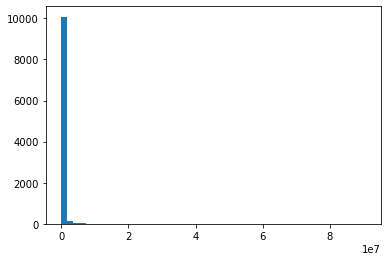

In [36]:
#Distribution of SteamSpyOwners. This and the other SteamSpy metrics are extremely skewed - will hold off further visualizing
#here and wait until the data are in Tableau, where I will likely create dynamic bins
_ = plt.hist(data['SteamSpyOwners'],bins=50)

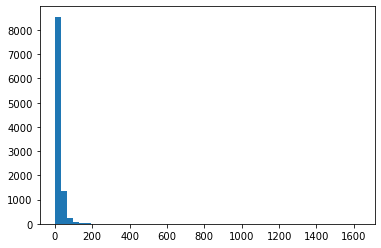

In [38]:
#Distribution of Achievement Count
_ = plt.hist(data['AchievementCount'],bins=50)

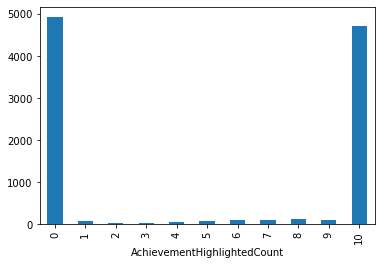

In [39]:
#Distribution of Achievement Highlighted Count. It appears Steam caps the number of highlighted achievements at 10
_ = data['AchievementHighlightedCount'].groupby(data['AchievementHighlightedCount'].astype('Int64')).count().plot(kind='bar')

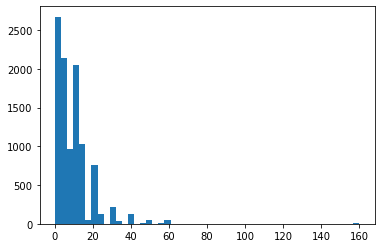

In [41]:
#Distribution of Initial Price
_ = plt.hist(data['PriceInitial'],bins=50)

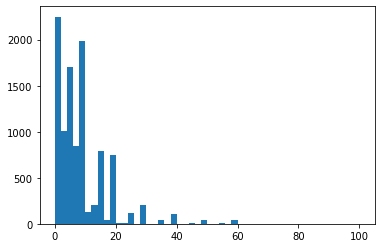

In [42]:
#Distribution of Final Price
_ = plt.hist(data['PriceFinal'],bins=50)

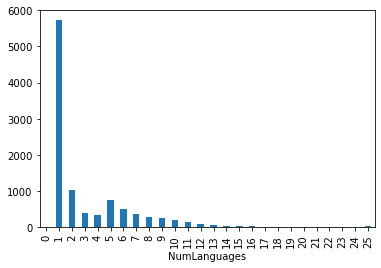

In [43]:
#Distribution of Number of Languages
_ = data['NumLanguages'].groupby(data['NumLanguages'].astype('Int64')).count().plot(kind='bar')

(0.0, 10000000.0)

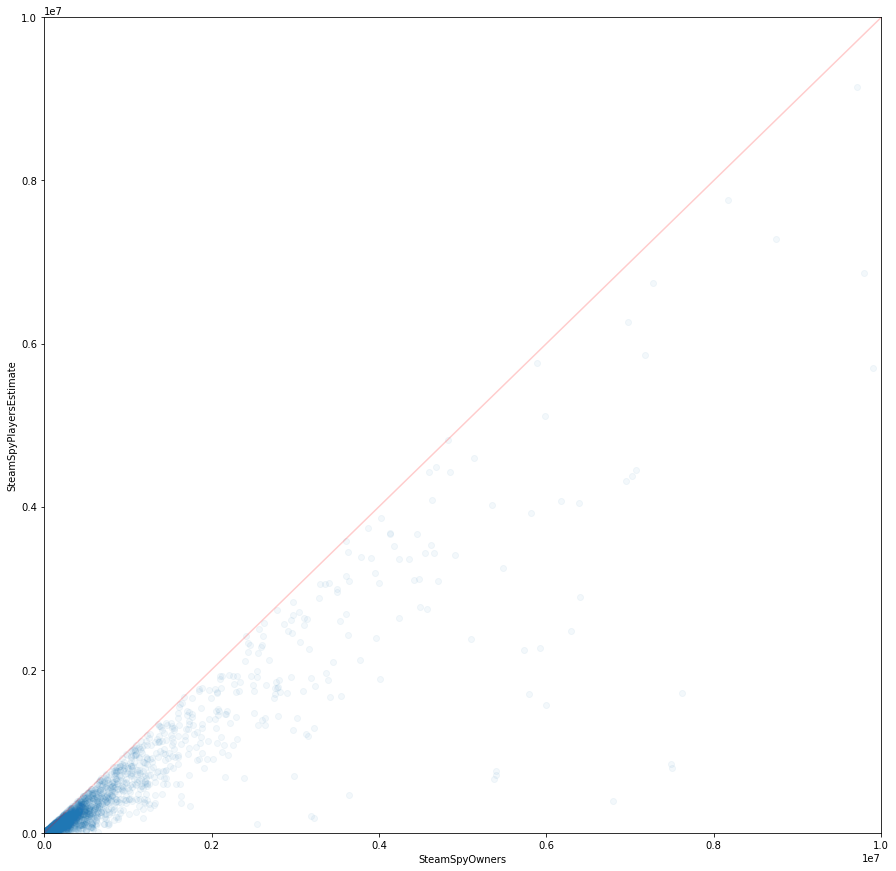

In [49]:
#Scatter plot to understand how SteamSpyOwners compares to SteamSpyPlayers
plt.figure(figsize=(15,15))
_ = plt.scatter(data['SteamSpyOwners'],data['SteamSpyPlayersEstimate'],alpha=.05)
_ = plt.xlabel('SteamSpyOwners')
_ = plt.ylabel('SteamSpyPlayersEstimate')
#Add a line of equivalence
upper_bound = min(max(data['SteamSpyOwners']),max(data['SteamSpyPlayersEstimate']))
_ = plt.plot([0,upper_bound],[0,upper_bound],color='red',alpha=0.2)
#Cap axis ranges to ignore outliers and better see the broader picture
plt.xlim([0,10000000])
plt.ylim([0,10000000])

Whereas I previously thought players could be larger than owners (e.g., players is since 2009, whereas owners perhaps was current owners), it appears players is always less than or equal to owners. This suggests to me players is a more rigorous measure of game popularity.

In general, it looks like most fields are highly skewed. In order to visualize some relationships I may need to create bins in order to fit the full range of values in one graphic.  Will explore this when working in Tableau, as the bins may need to be dynamic to accommodate different filters, slicing etc.

In [51]:
print(data.shape)
data.to_csv('../data/interim/data_post_EDA.csv')

(10294, 93)
